<a href="https://www.kaggle.com/code/andrey36912/laba-mood-4-part-2?scriptVersionId=190492751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

torch.Size([128, 3])
torch.Size([128, 1])
Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)
Epoch 1/10, Loss: 94.77279478130919
Epoch 2/10, Loss: 69.97805797692502
Epoch 3/10, Loss: 38.02688118905732
Epoch 4/10, Loss: 15.298624327688506
Epoch 5/10, Loss: 9.115792101079768
Epoch 6/10, Loss: 8.402749148282139
Epoch 7/10, Loss: 8.322124481201172
Epoch 8/10, Loss: 8.284298911239162
Epoch 9/10, Loss: 8.25599007173018
Epoch 10/10, Loss: 8.260645794145988


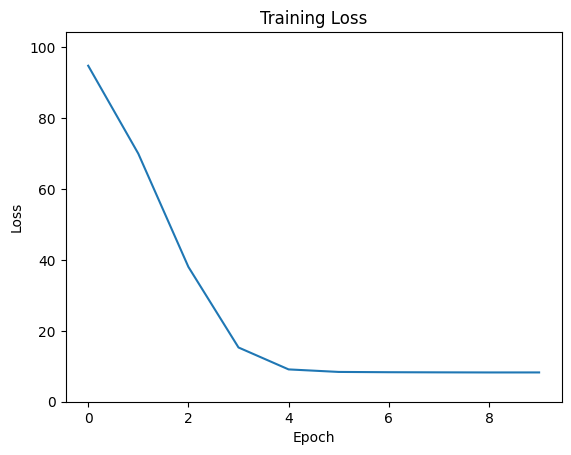

tensor([[0.5000, 0.4000, 0.1000]])
torch.Size([1, 3])
Predicted Rings: 9.854874610900879


In [2]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

class AbaloneDataset(Dataset):
    def __init__(self, df):
        self.X = torch.tensor(df.drop(columns=['Rings']).values, dtype=torch.float32)
        self.y = torch.tensor(df['Rings'].values, dtype=torch.float32).unsqueeze(1)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = AbaloneDataset(df)

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True)

X_batch, y_batch = next(iter(dataloader))
print(X_batch.shape)
print(y_batch.shape)

# Створення моделі
model = nn.Sequential(
    nn.Linear(3, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
).to(device)

print(model)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

import numpy as np

num_epochs = 10
losses = []

for epoch in range(num_epochs):
    losses_ = []
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())
        loss.backward() # рахуємо градієнти
        optimizer.step()
        optimizer.zero_grad()
    
    losses.append(np.mean(losses_))
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {losses[-1]}')

import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, max(losses) * 1.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

torch.save(model.state_dict(), 'neural_network.pth')

load_model = nn.Sequential(
    nn.Linear(3, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)
load_model.load_state_dict(torch.load('neural_network.pth'))
load_model.to(device)

X_data = torch.tensor([[0.5, 0.4, 0.1]], dtype=torch.float32).to(device)
print(X_data)
print(X_data.shape)

with torch.no_grad():
    prediction = load_model(X_data)
    print(f'Predicted Rings: {prediction.item()}')